In [ ]:
import pandas as pd
data = pd.read_csv('/content/BMBC-spend-2019-to-2023-over-4-million - Sheet2.csv')

In [ ]:
data.dtypes

Expense Type    object
2019/20         object
2020/21         object
2021/22         object
2022/23         object
dtype: object

In [ ]:
data.head()

,Expense Type,2019/20,2020/21,2021/22,2022/23
0,Repair & Maintenance Of Buildings,"61,642,444.57","47,231,771.55","61,439,043.37","60,026,558.01"
1,Grants to schools,"59,349,178.78","55,700,678.36","54,523,866.16","56,255,121.00"
2,Residential long term,"20,113,670.92","26,227,346.68","30,275,454.05","32,327,251.30"
3,Property Management,"37,798,668.87","23,376,734.75","35,408,791.73","31,644,525.60"
4,Energy - Bio Mass Fuel,"10,029,567.36","24,767,184.89","14,129,466.84","21,910,196.42"


In [ ]:
df = data[['Expense Type', '2019/20', '2020/21', '2021/22', '2022/23']]

In [ ]:
df.sample(3)

,Expense Type,2019/20,2020/21,2021/22,2022/23
29,Drug & Alcohol Support,"2,799,080.73","3,517,894.27","3,750,302.45","4,387,250.30"
2,Residential long term,"20,113,670.92","26,227,346.68","30,275,454.05","32,327,251.30"
11,Grants to Academies,"13,895,136.99","14,999,428.62","15,009,005.72","14,879,255.00"


In [ ]:
# prompt: show all df expence type

df['Expense Type'].unique()


array(['Repair & Maintenance Of Buildings', 'Grants to schools',
       'Residential long term', 'Property Management',
       'Energy - Bio Mass Fuel', 'Voluntary Associations',
       'Precept Payments', 'PWLB Interest', 'Main contractor',
       'Tenant Mgmt Org - Management fee', 'Out Of Borough Placements',
       'Grants to Academies', 'Community: Direct Payments',
       'Community: Supported Living', 'Community: Homecare',
       'Energy - Electricity', 'Other Public Sector Agencies', 'Grants',
       'Basic pay - Agency Fees', 'Consultants Fees',
       'Benefits - Housing Benefit Rent Allowanc',
       'Payments to Health Authorities', 'Projects',
       'Transport Services - Home to School', 'Professional fees',
       'Nursing Long Term', 'Property Rents',
       'Collection Fund - NNDR refunds paid', 'Miscellaneous Materials',
       'Drug & Alcohol Support', 'Computer Software -  Licenses',
       'Direct - Highway Materials',
       'Cleaning -  Buildings - External Prov

In [ ]:
df.dtypes

Expense Type    object
2019/20         object
2020/21         object
2021/22         object
2022/23         object
dtype: object

In [ ]:
categories = {
    'Grants to schools': 'Education and Schools',
    'Main contractor': 'Government Administration and Finance',
    'Property Management': 'Infrastructure and Public Works',
    'Residential long term': 'Health and Social Care',
    'Precept Payments': 'Government Administration and Finance',
    'Voluntary Associations': 'Community and Social Services',
    'Energy - Bio Mass Fuel': 'Infrastructure and Public Works',
    'PWLB Interest': 'Government Administration and Finance',
    'Miscellaneous Services': 'Government Administration and Finance',
    'Grants to Academies': 'Education and Schools',
    'Community: Direct Payments': 'Health and Social Care',
    'Out Of Borough Placements': 'Health and Social Care',
    'Tenant Mgmt Org - Management fee': 'Government Administration and Finance',
    'Other units within Authority': 'Government Administration and Finance',
    'Community: Supported Living': 'Health and Social Care',
    'Other Public Sector Agencies': 'Government Administration and Finance',
    'Community: Homecare': 'Health and Social Care',
    'Purchase Price / Purchase Prices': 'Government Administration and Finance',
    'Grants': 'Government Administration and Finance',
    'Payments to Health Authorities': 'Health and Social Care',
    'Energy - Electricity': 'Infrastructure and Public Works',
    'Consultants Fees': 'Government Administration and Finance',
    'Benefits - Housing Benefit Rent Allowanc': 'Government Administration and Finance',
    'Basic pay - Agency Fees': 'Government Administration and Finance',
    'Nursing Long Term': 'Health and Social Care',
    'Direct - Highway Materials': 'Infrastructure and Public Works',
    'Property Rents': 'Infrastructure and Public Works',
    'Collection Fund - NNDR refunds paid': 'Government Administration and Finance',
    'Transport Services - Home to School': 'Education and Schools',
    'Cleaning -  Buildings - External Provide': 'Cleaning and Maintenance',
    'Professional fees': 'Government Administration and Finance',
    'Drug & Alcohol Support': 'Health and Social Care',
    'Community Services': 'Community and Social Services',
    'Projects': 'Government Administration and Finance',
    'Computer Software -  Licenses': 'Government Administration and Finance',
    'Unascertained Material Group': 'Government Administration and Finance',
    'COVID - Restart Grants': 'COVID-19 Specific Expenditures',
    'Miscellaneous Materials': 'Government Administration and Finance',
    'Community: Other - Other': 'Community and Social Services',

'Other Transfer payments': 'Government Administration and Finance',
'COVID 19 - Payments to Taxi Drivers': 'COVID-19 Specific Expenditures'
}

In [ ]:
df['Category'] = df['Expense Type'].map(categories)

# Handling any expense types that weren't in the categories dictionary
df['Category'] = df['Category'].fillna('Other')

In [ ]:
df.head()

,Expense Type,2019/20,2020/21,2021/22,2022/23,Category
0,Repair & Maintenance Of Buildings,"61,642,444.57","47,231,771.55","61,439,043.37","60,026,558.01",Other
1,Grants to schools,"59,349,178.78","55,700,678.36","54,523,866.16","56,255,121.00",Education and Schools
2,Residential long term,"20,113,670.92","26,227,346.68","30,275,454.05","32,327,251.30",Health and Social Care
3,Property Management,"37,798,668.87","23,376,734.75","35,408,791.73","31,644,525.60",Infrastructure and Public Works
4,Energy - Bio Mass Fuel,"10,029,567.36","24,767,184.89","14,129,466.84","21,910,196.42",Infrastructure and Public Works


In [ ]:
# Create a DataFrame
df = pd.DataFrame(df)

# Define numeric columns
numeric_columns = ['2019/20', '2020/21', '2021/22', '2022/23']

# Replace commas and empty cells with 0, then convert to numeric
df[numeric_columns] = df[numeric_columns].replace({',': '', '': '0'}, regex=True).apply(pd.to_numeric, errors='coerce')

# Add a 'Total' column
df['Total'] = df[numeric_columns].sum(axis=1)

# Display the modified DataFrame
df.head()

,Expense Type,2019/20,2020/21,2021/22,2022/23,Category,Total
0,Repair & Maintenance Of Buildings,61642444.57,47231771.55,61439043.37,60026558.01,Other,2.303398e+08
1,Grants to schools,59349178.78,55700678.36,54523866.16,56255121.00,Education and Schools,2.258288e+08
2,Residential long term,20113670.92,26227346.68,30275454.05,32327251.30,Health and Social Care,1.089437e+08
3,Property Management,37798668.87,23376734.75,35408791.73,31644525.60,Infrastructure and Public Works,1.282287e+08
4,Energy - Bio Mass Fuel,10029567.36,24767184.89,14129466.84,21910196.42,Infrastructure and Public Works,7.083642e+07


In [ ]:
df.dtypes

Expense Type     object
2019/20         float64
2020/21         float64
2021/22         float64
2022/23         float64
Category         object
Total           float64
dtype: object

In [ ]:
df.sample()

,Expense Type,2019/20,2020/21,2021/22,2022/23,Category,Total
14,Community: Homecare,5172354.23,7228655.97,9959359.47,12145339.69,Health and Social Care,34505709.36


In [ ]:
# Sorting the DataFrame by the 'Total' column in descending order
df_sorted = df.sort_values(by='Total', ascending=False)

In [ ]:
df_sorted.head()

,Expense Type,2019/20,2020/21,2021/22,2022/23,Category,Total
0,Repair & Maintenance Of Buildings,61642444.57,47231771.55,61439043.37,60026558.01,Other,2.303398e+08
1,Grants to schools,59349178.78,55700678.36,54523866.16,56255121.00,Education and Schools,2.258288e+08
8,Main contractor,70097855.77,74812410.81,19410386.11,17646750.32,Government Administration and Finance,1.819674e+08
3,Property Management,37798668.87,23376734.75,35408791.73,31644525.60,Infrastructure and Public Works,1.282287e+08
2,Residential long term,20113670.92,26227346.68,30275454.05,32327251.30,Health and Social Care,1.089437e+08


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

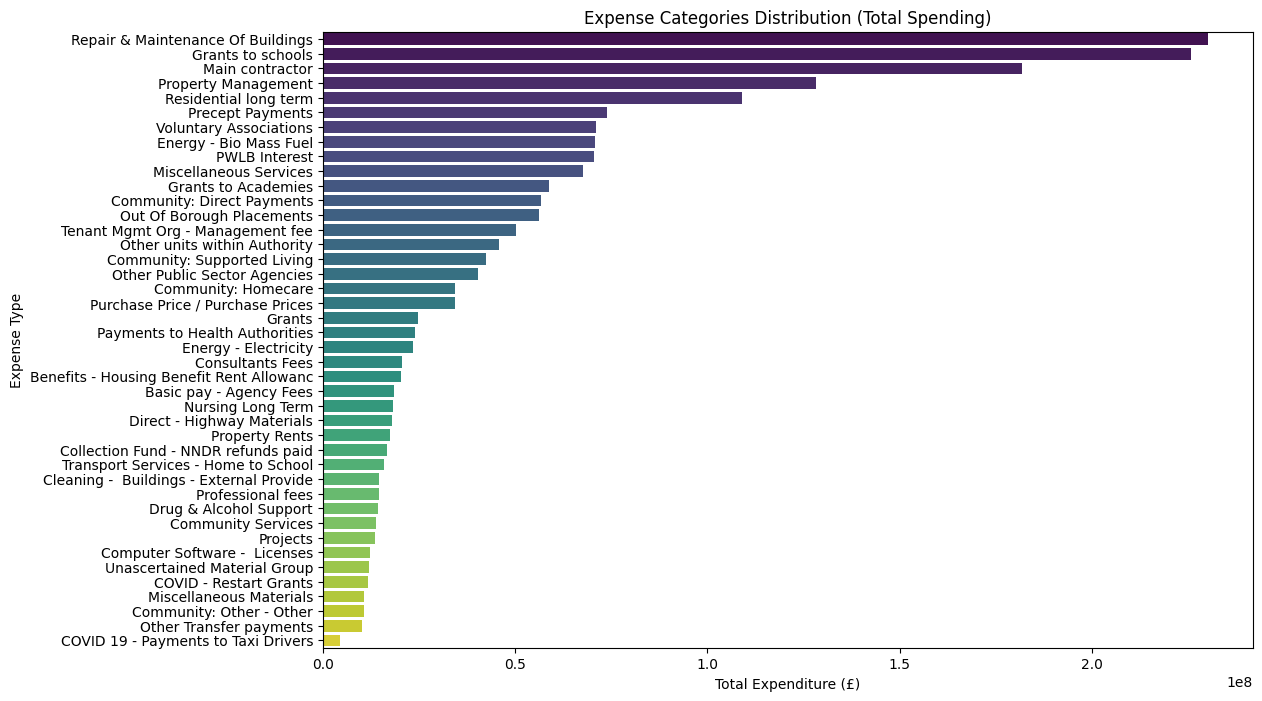

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Expense Type', data=df.sort_values(by='Total', ascending=False), palette='viridis')
plt.title('Expense Categories Distribution (Total Spending)')
plt.xlabel('Total Expenditure (£)')
plt.ylabel('Expense Type')
plt.show()


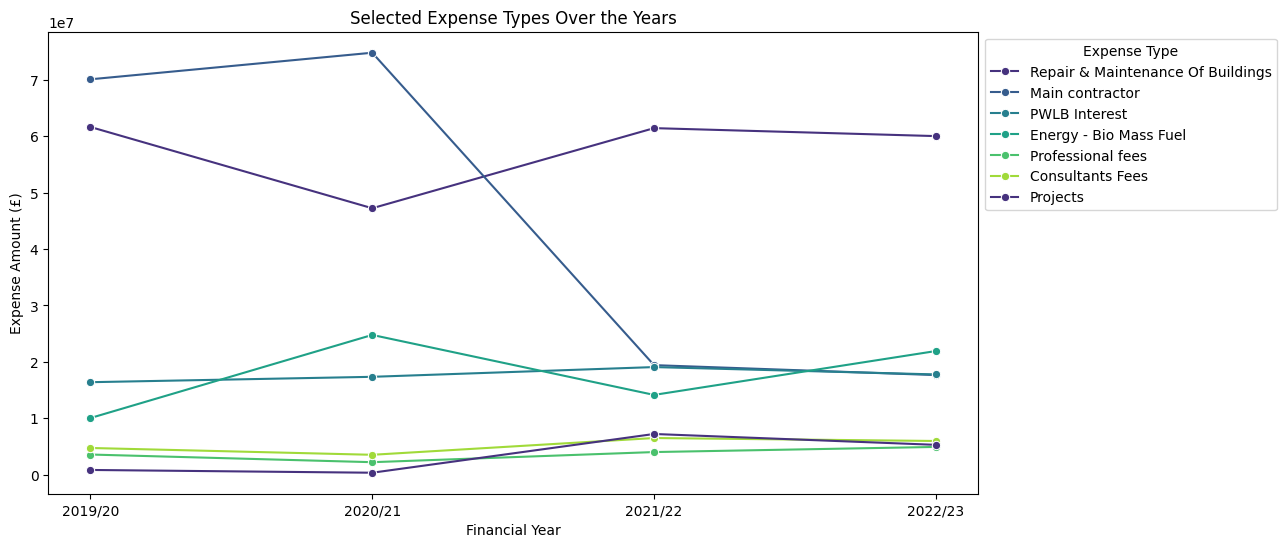

In [ ]:
# Set the Expense Type as the index for better plotting
df.set_index('Expense Type', inplace=True)

# Select specific Expense Types for visualization
selected_expenses = ['Repair & Maintenance Of Buildings', 'Main contractor', 'PWLB Interest', 'Energy - Bio Mass Fuel', 'Professional fees', 'Consultants Fees', 'Projects']

# Filter DataFrame for selected Expense Types
selected_df = df.loc[selected_expenses, ['2019/20', '2020/21', '2021/22', '2022/23']]

# Transpose the DataFrame for better plotting
selected_df = selected_df.T

# Plot using seaborn for better aesthetics
plt.figure(figsize=(12, 6))
sns.set_palette("viridis")


# Iterate through each Expense Type and plot a line
for expense_type in selected_expenses:
    sns.lineplot(data=selected_df[expense_type], marker='o', label=expense_type)

plt.title('Selected Expense Types Over the Years')
plt.xlabel('Financial Year')
plt.ylabel('Expense Amount (£)')
plt.legend(title='Expense Type', bbox_to_anchor=(1, 1))
plt.show()


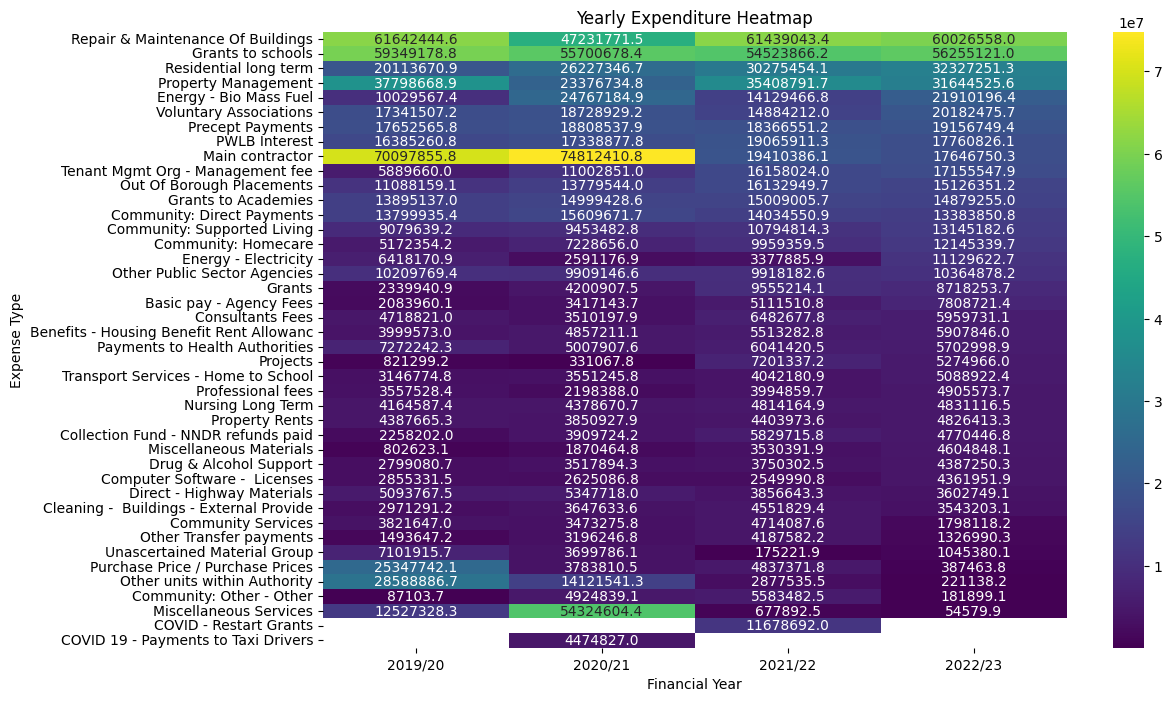

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['2019/20', '2020/21', '2021/22', '2022/23']], annot=True, fmt=".1f", cmap='viridis')
plt.title('Yearly Expenditure Heatmap')
plt.xlabel('Financial Year')
plt.ylabel('Expense Type')
plt.show()